In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
alt.data_transformers.enable('vegafusion')


DataTransformerRegistry.enable('vegafusion')

In [2]:
path = '../data/raw/tracks.csv'
df = pd.read_csv(path)
df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
df.shape

(586672, 20)

In [4]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [6]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

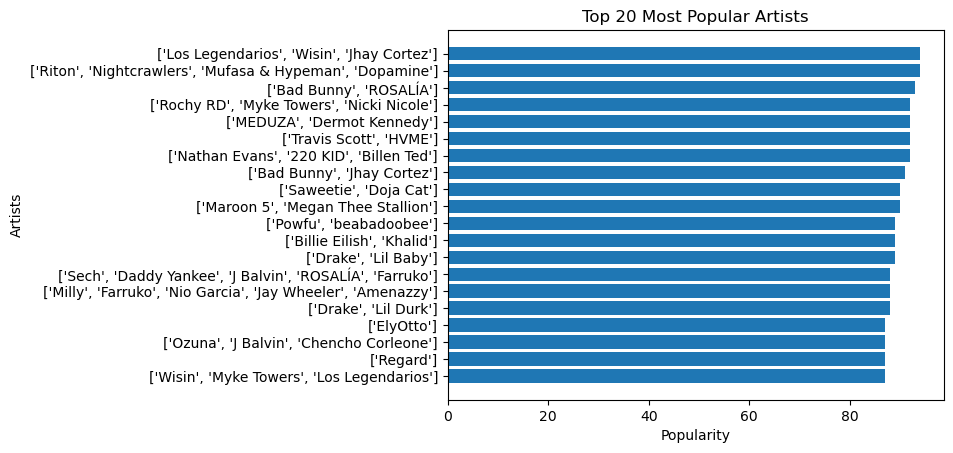

In [20]:
df_artist = df.groupby('artists')['popularity'].mean().sort_values().nlargest(20)
artists = df_artist.index
popularity = df_artist.values
plt.barh(artists, popularity)
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.title('Top 20 Most Popular Artists')
plt.gca().invert_yaxis()
plt.show()

<Axes: >

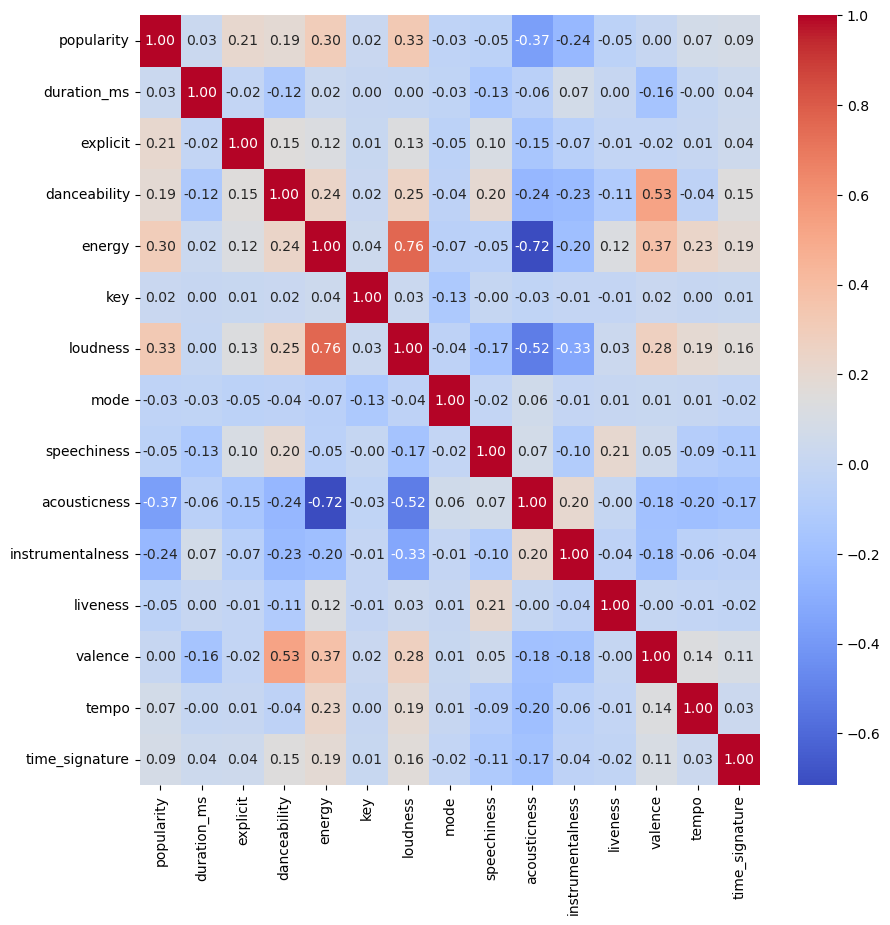

In [9]:
df_num = df.select_dtypes(include=['number'])
df_corr = df_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')


In [10]:
popularity_correlations = df_corr['popularity'].sort_values()
print(popularity_correlations)

acousticness       -0.370882
instrumentalness   -0.236487
liveness           -0.048740
speechiness        -0.047357
mode               -0.033655
valence             0.004643
key                 0.015299
duration_ms         0.027681
tempo               0.071364
time_signature      0.086759
danceability        0.187000
explicit            0.211758
energy              0.302315
loudness            0.327028
popularity          1.000000
Name: popularity, dtype: float64


In [11]:
df['speechiness_category'] = pd.cut(df['speechiness'],
                                     bins=[0, 0.33, 0.66, 1],
                                       right=False, 
                                       labels=['Low Speechiness',
                                                'Medium Speechiness', 
                                                'High Speechiness'])

df['live'] = np.where(df['liveness'] > 0.8,
                         'Live', 'Not Live')

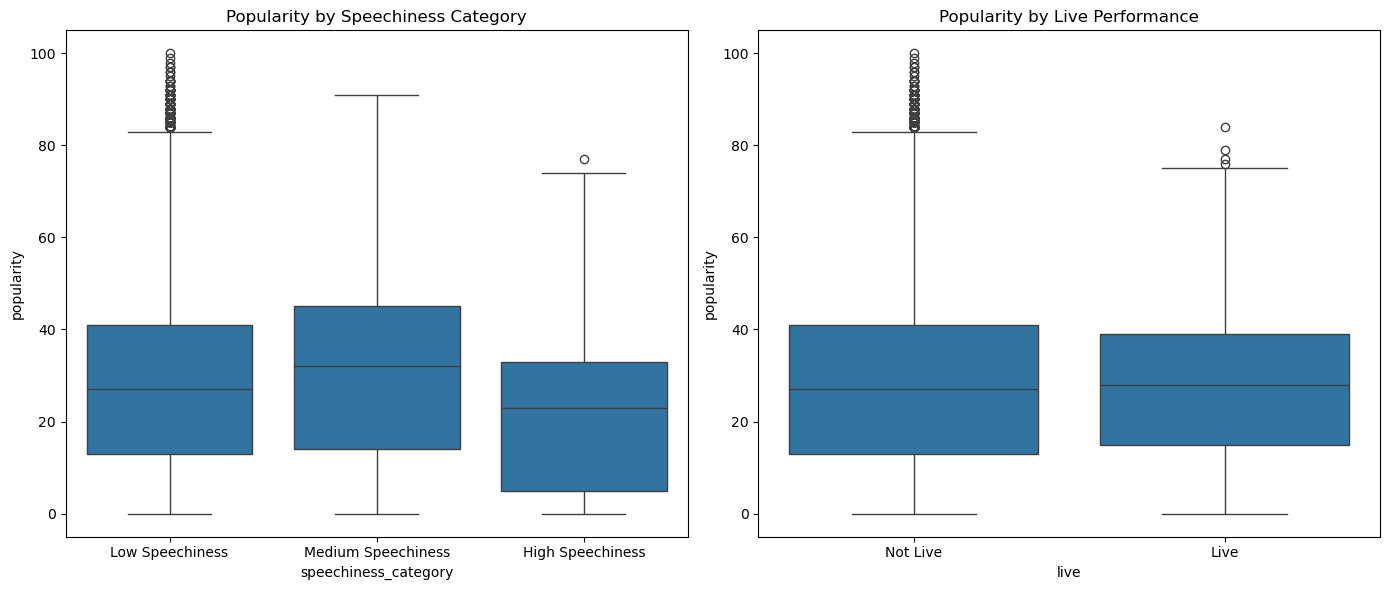

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='speechiness_category', y='popularity', data=df)
plt.title('Popularity by Speechiness Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='live', y='popularity', data=df)
plt.title('Popularity by Live Performance')

plt.tight_layout()
plt.show()

In [13]:
path2 = '../data/raw/artists.csv'
artists_df = pd.read_csv(path2)

In [14]:
artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [15]:
artists_df.shape

(1162095, 5)

In [16]:
artists_df.isnull().sum()

id             0
followers     11
genres         0
name           3
popularity     0
dtype: int64

In [29]:
df2.tail()

,id,followers,genres,name,popularity
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,['new comedy'],Gabe Kea,8


In [30]:
top_genres 

genres
['canadian pop', 'pop', 'post-teen pop']                                            100.0
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']     98.0
['canadian contemporary r&b', 'canadian pop', 'pop']                                 96.0
['chicago rap', 'melodic rap']                                                       96.0
['dance pop', 'pop', 'uk pop']                                                       95.0
['detroit hip hop', 'hip hop', 'rap']                                                94.0
['rap', 'slap house']                                                                94.0
['atl hip hop', 'atl trap', 'rap', 'trap']                                           93.0
['dfw rap', 'melodic rap', 'rap']                                                    93.0
['latin', 'puerto rican pop', 'reggaeton', 'trap latino']                            93.0
Name: popularity, dtype: float64

In [42]:
import ast
artists_df['genres'] = artists_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [43]:
artists_df_exploded = artists_df.explode('genres')

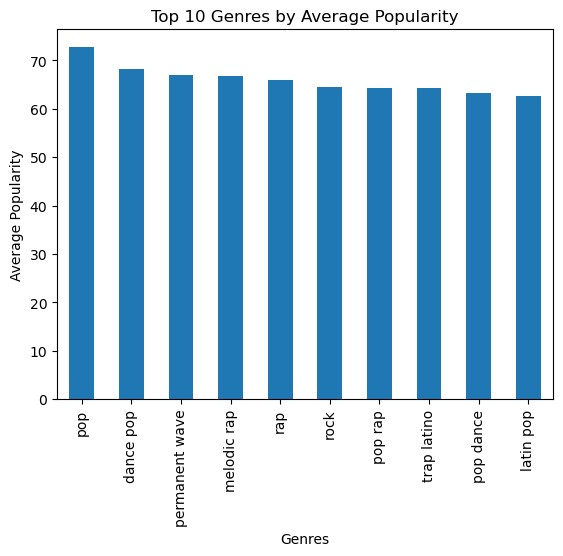

In [44]:
top_genres = artists_df_exploded .groupby('genres')['popularity'].mean().nlargest(10)
top_genres.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Top 10 Genres by Average Popularity')
plt.show()